## 1.加载数据

In [2]:
from sklearn.model_selection import train_test_split # 引入数据集拆分函数
from sklearn.linear_model import LinearRegression # 引入LinearRegression类

In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv("boston.csv")

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [9]:
data[['CRIM','MEDV']]

,CRIM,MEDV
0,0.00632,24.0
1,0.02731,21.6
2,0.02729,34.7
3,0.03237,33.4
4,0.06905,36.2
...,...,...
501,0.06263,22.4
502,0.04527,20.6
503,0.06076,23.9
504,0.10959,22.0


In [12]:
# 获取第13列
data_1 = data.iloc[:,12]
print(data_1)
data_1 =np.array(data_1)
# print(data_1)
# 获取第1-13列
data_12 = data.iloc[:,0:12]
data_12 = np.array(data_12)
# print(data_12)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [11]:
data_1

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## 2.数据切分

In [13]:
# 将data和target随机拆分为训练集和测试集（test_size=0.25代表25%的数据作为测试集，75%为训练集）
X_train, X_test, y_train, y_test = train_test_split(data_12, data_1, 
                                                    test_size=0.25,  random_state=0)
print(X_train.shape, X_test.shape) # 查看拆分结果
print(y_train.shape, y_test.shape)

(379, 12) (127, 12)
(379,) (127,)


In [16]:
X_test.shape

(127, 12)

### 3、创建LinearRegression模型，拟合数据

In [5]:
# 创建模型
model--a = LinearRegression( 参数)

# 拟合训练数据(即将特征数据和标签数据交给模型去训练)
model.fit(X_train, y_train)

# 注意：上面两步也可以合并写成这样
# model = LinearRegression().fit(X_train, y_train)

LinearRegression()

### 4、使用模型预测测试集中房屋的价格

In [6]:
import numpy as np

# 预测测试集的输出（即测试集中房屋的房价）
y_pred = model.predict(X_test) 
print(y_pred[:10])# 预测前10套房屋的价格

# 将预测结果与实际价格做对比
print('\n预测价格：', np.round(y_pred[:10])) # np.round()-四舍五入取整
print('实际价格：', np.round(y_test[:10]))

[24.97126044 23.39115035 29.32351319 11.15726121 21.21329583 19.53396915
 19.80616751 21.51676574 19.31622522 22.72304208]

预测价格： [25. 23. 29. 11. 21. 20. 20. 22. 19. 23.]
实际价格： [23. 50. 23.  8. 21. 20. 21. 19. 16. 19.]


### 5、评估模型

In [7]:
# 使用score方法评估模型的成绩
train_score = model.score(X_train, y_train) # 获得模型在训练集上的成绩
test_score = model.score(X_test, y_test) # 获得模型在测试集上的成绩
print('Train set score:', train_score)
print('Test set score:', test_score)

Train set score: 0.7648872489912192
Test set score: 0.6266763285024726


In [8]:
# 计算均方误差
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# 计算RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error: 30.500176401058866
Root Mean Squared Error: 5.522696479172006
R² Score: 0.6266763285024726


### 6、使用Matplotlib生成房价预测走势曲线

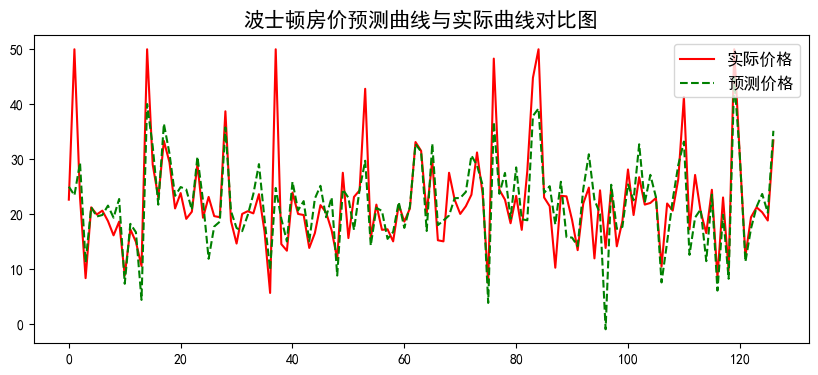

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # 设置画板尺寸
plt.rcParams['font.sans-serif'] = 'SimHei' # 设置中文字体
plt.title('波士顿房价预测曲线与实际曲线对比图', fontsize=15)
x = range(len(y_test)) # x轴数据

plt.plot(x, y_test, color='r', label='实际价格') # 实际价格曲线
plt.plot(x, y_pred, color='g', ls='--', label='预测价格') # 预测价格曲线
plt.legend(fontsize=12, loc=1) # 显示图例
plt.show()

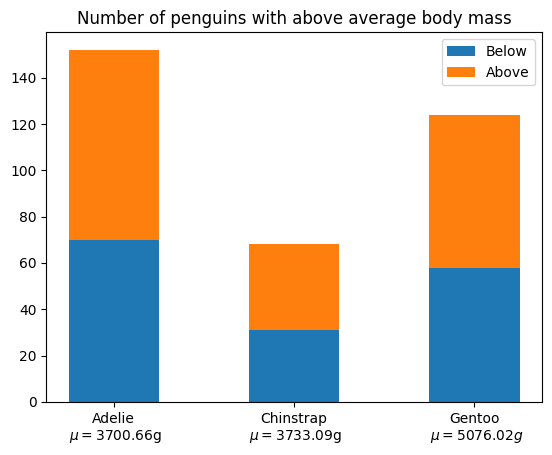

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# data from https://allisonhorst.github.io/palmerpenguins/

species = (
    "Adelie\n $\\mu=$3700.66g",
    "Chinstrap\n $\\mu=$3733.09g",
    "Gentoo\n $\\mu=5076.02g$",
)
weight_counts = {
    "Below": np.array([70, 31, 58]),
    "Above": np.array([82, 37, 66]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Number of penguins with above average body mass")
ax.legend(loc="upper right")

plt.show()

### 7、使用Ridge（岭回归）建模

In [10]:
from sklearn.model_selection import train_test_split # 引入数据集拆分函数
from sklearn.linear_model import Ridge # 引入Ridge模型

# 拆分数据集
X_train, X_test, y_train, y_test = train_test_split(data_12, data_1, 
                                                    test_size=0.25, random_state=66)
# 构建模型
model = Ridge(alpha=10).fit(X_train, y_train)

# 评估模型
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print('train score:{:.2f}'.format(train_score), '\ntest  score:{:.2f}'.format(test_score))

train score:0.70 
test  score:0.79


In [11]:
y_pred = model.predict(X_test) 
# 计算均方误差
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# 计算RMSE
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Squared Error: 17.10296078759246
Root Mean Squared Error: 4.135572606978683
R² Score: 0.7942551806224059
